# Logistic Regression Project Oefening

**DOEL: Creëer een classificatiemodel dat kan voorspellen of een persoon al dan niet een hartziekte heeft op basis van de fysieke kenmerken van die persoon. (age,sex, cholesterol, etc...)**

**Voltooi de TAKEN die hieronder vetgedrukt zijn geschreven.**

## Imports

**TAAK: Voer de cel hieronder uit om de benodigde bibliotheken te importeren.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

Deze database bevat 14 fysieke kenmerken gebaseerd op fysieke tests van een patiënt. Er worden bloedmonsters genomen en de patiënt ondergaat ook een korte inspanningstest. Het veld "doel" verwijst naar de aanwezigheid van hartziekten bij de patiënt. Het is een geheel getal (0 voor geen aanwezigheid, 1 voor aanwezigheid). Over het algemeen kan het 100% bevestigen of een patiënt hartziekten heeft een vrij invasief proces zijn, dus als we een model kunnen maken dat nauwkeurig de kans op hartziekten voorspelt, kunnen we dure en invasieve procedures vermijden.

Inhoud

Informatie over de attributen:
* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl  (nuchtere bloedsuiker)
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Originele bron: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

----

**TAAK: Voer de cel hieronder uit om de gegevens in te lezen.**

In [2]:
file_path = "C:/LR_Heart_Disease/heart-disease-prediction/data/heart.csv"
df = pd.read_csv(file_path)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df['target'].unique()

array([1, 0])

### Verkennende Gegevensanalyse en Visualisatie.

Voel je vrij om de gegevens verder op eigen initiatief te verkennen.

**TAAK: Onderzoek of de dataset ontbrekende gegevenspunten heeft en maak een statistische samenvatting van de numerieke kenmerken zoals hieronder getoond.**

In [6]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Get statistical summary of numerical features
statistical_summary = df.describe()
missing_values, statistical_summary

(age         0
 sex         0
 cp          0
 trestbps    0
 chol        0
 fbs         0
 restecg     0
 thalach     0
 exang       0
 oldpeak     0
 slope       0
 ca          0
 thal        0
 target      0
 dtype: int64,
               age         sex          cp    trestbps        chol         fbs  \
 count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
 mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
 std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
 min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
 25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
 50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
 75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
 max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   
 
           restecg     thalach     

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
statistical_summary_transposed = df.describe().T
display(statistical_summary_transposed)

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Visualisatietaken

**TAAK: Maak een staafdiagram dat de totale tellingen per doelwaarde toont.**

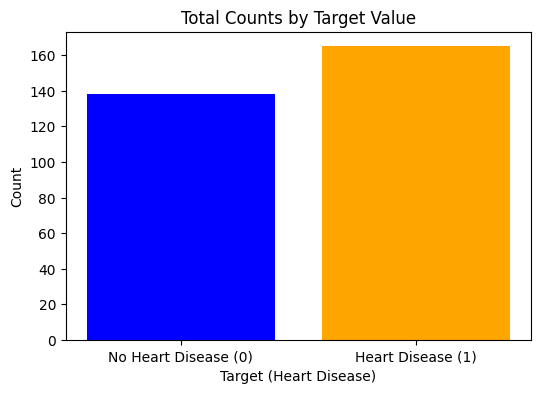

In [9]:
import matplotlib.pyplot as plt

# Count values for each target class (0: No Heart Disease, 1: Heart Disease)
target_counts = df['target'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(target_counts.index, target_counts.values, color=['orange', 'blue'])
plt.xlabel("Target (Heart Disease)")
plt.ylabel("Count")
plt.title("Total Counts by Target Value")
plt.xticks([0, 1], ["No Heart Disease (0)", "Heart Disease (1)"])

plt.show()

<AxesSubplot:xlabel='target', ylabel='count'>

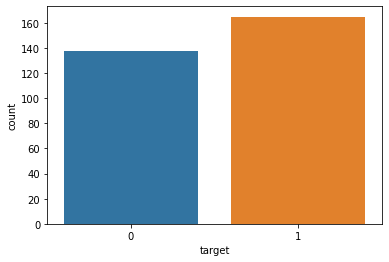

**TAAK: Maak een pairplot die de relaties toont tussen de volgende kolommen:**

    ['age','trestbps', 'chol','thalach','target']
   
*Opmerking: Een pairplot uitvoeren op alles kan erg lang duren vanwege het aantal kenmerken*

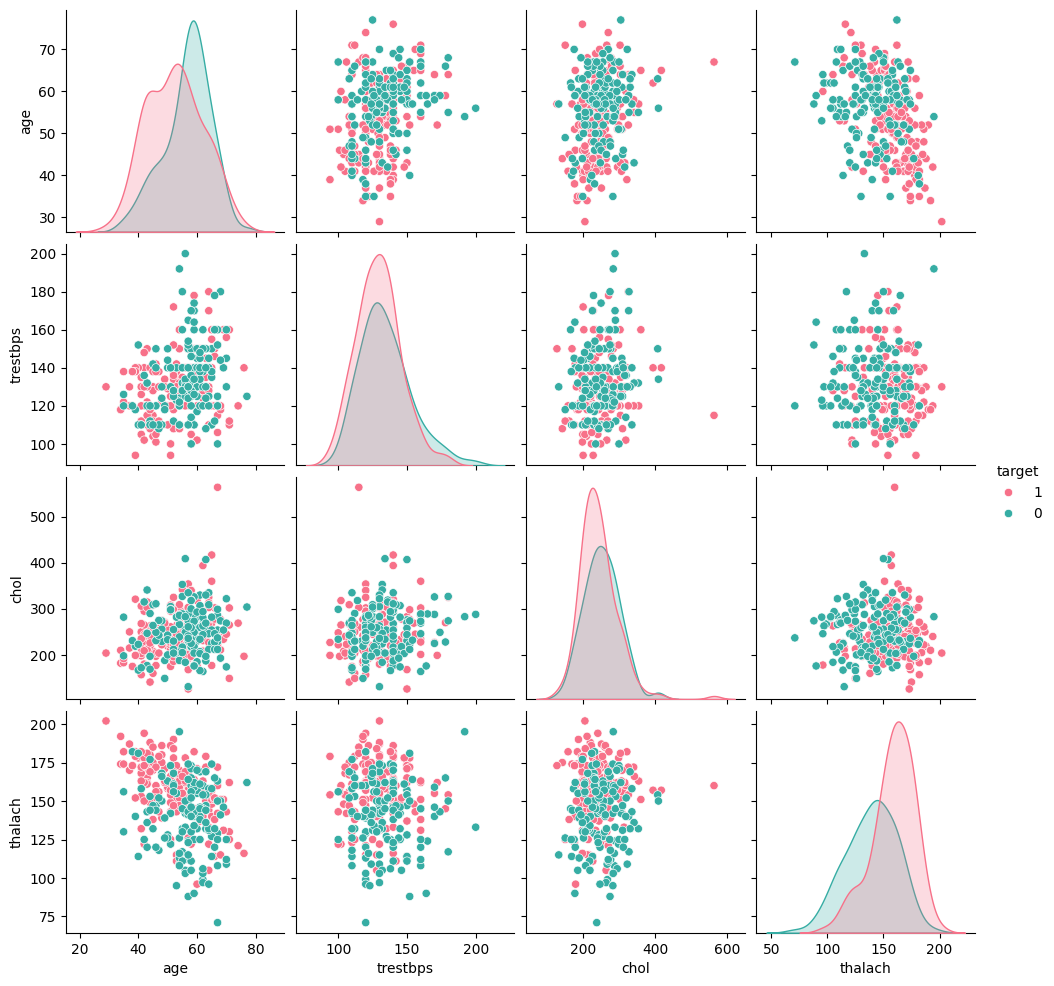

In [10]:
df_selected = df[['age', 'trestbps', 'chol', 'thalach', 'target']].dropna()

# Convert 'target' to categorical for better visualization
df_selected['target'] = df_selected['target'].astype(str)

# KDE plot - pairplot
sns.pairplot(df_selected, hue="target", diag_kind="kde", palette="husl")

plt.show()

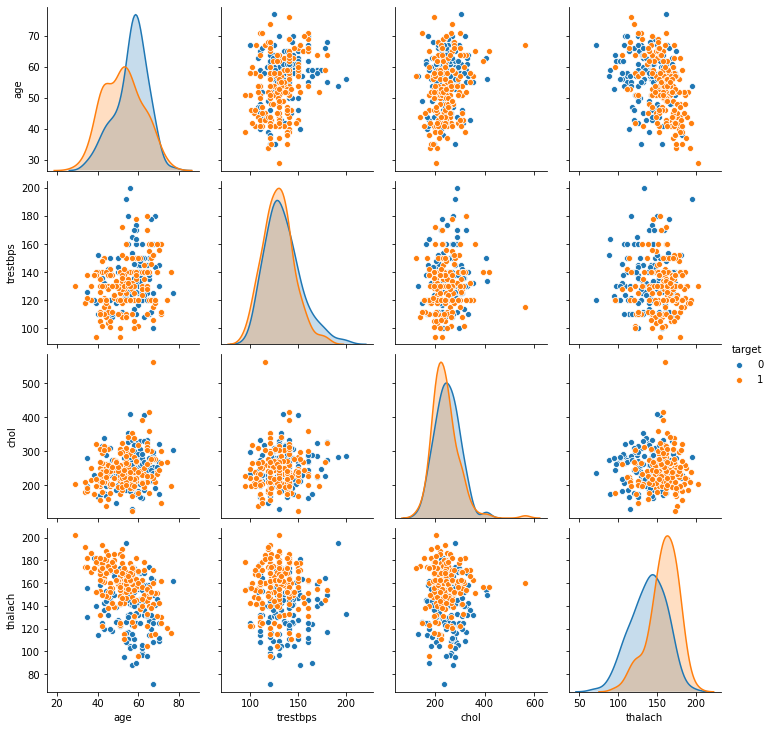

**TAAK: Maak een heatmap die de correlatie toont tussen alle kolommen.**

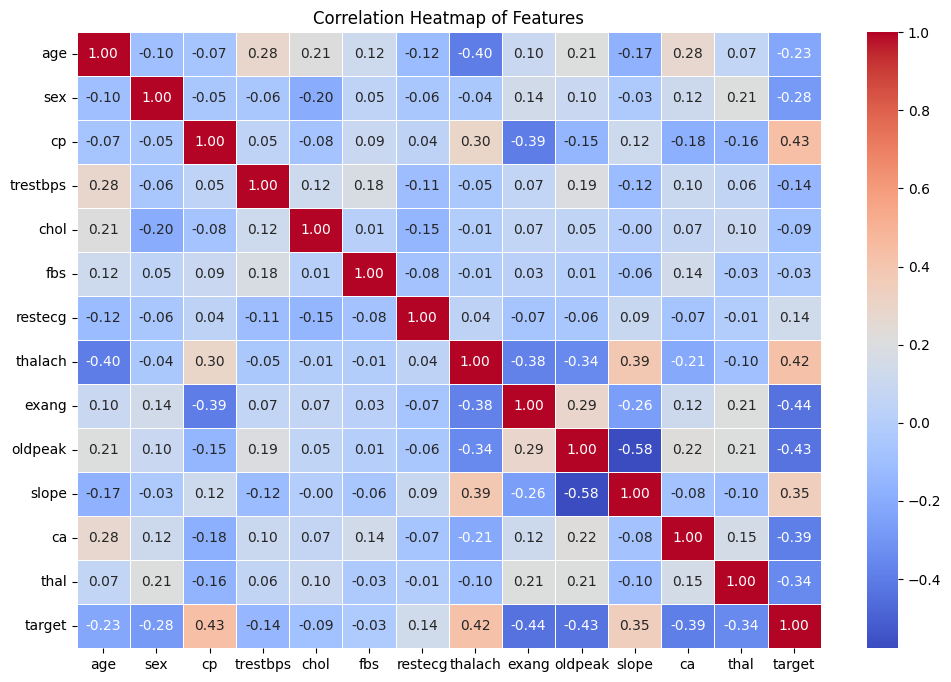

In [11]:
# Compute the correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Features")
plt.show()

- Red tones: Strong positive correlation.
- Blue tones: Strong negative correlation.
- Values close to 0: Weak or no correlation.

<AxesSubplot:>

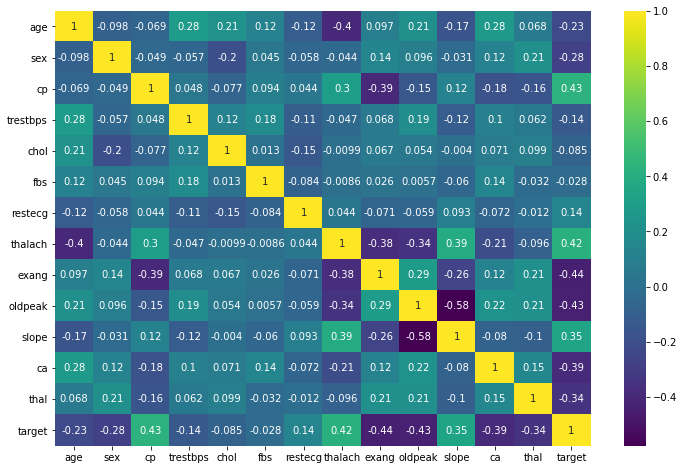

----
----

# Machine Learning

## Train | Test Split en Scaling

**TAAK: Splits de features en de labels in 2 objecten X and y.**

In [12]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=['target'])  # Features (all columns except target)
y = df['target']  # Target variable

X.shape, y.shape

((303, 13), (303,))

**TAAK: Voer een train-test splitsing uit op de gegevens, met een testgrootte van 10% en een random_state van 101.**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((272, 13), (31, 13), (272,), (31,))

**TAAK: Maak een StandardScaler object en normaliseer de X train en test set kenmerkgegevens. Zorg ervoor dat je alleen fit op de trainingsgegevens om een datalek te voorkomen (kennis lekken vanuit de testset).**

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler only on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
scaled_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1.049702,0.697380,1.979932,-1.235333,-0.668959,-0.427327,-0.995772,-0.262159,1.470643,0.727627,-0.671680,-0.714226,-0.484215
1,0.616441,0.697380,-0.946924,-0.837418,-0.308160,2.340126,0.898284,0.439512,1.470643,0.370702,0.945107,1.238231,1.141790
2,-0.683342,0.697380,0.028695,-1.235333,-0.327149,-0.427327,0.898284,0.790348,-0.679975,0.013778,-2.288466,-0.714226,1.141790
3,-0.250081,-1.433939,1.004313,0.242636,-0.953801,-0.427327,-0.995772,0.834202,-0.679975,-0.789301,-0.671680,-0.714226,-0.484215
4,-0.899973,-1.433939,-0.946924,0.356326,-0.061297,-0.427327,-0.995772,0.088676,1.470643,-0.878532,-0.671680,-0.714226,-0.484215


## Logistic Regression Model

**TAAK: Maak een logistiek regressiemodel en gebruik kruisvalidatie om een goed presterende C-waarde te vinden voor de hyperparameter-zoekopdracht. Je hebt hier twee opties: gebruik LogisticRegressionCV OF gebruik een combinatie van LogisticRegression en GridSearchCV. De keuze is aan jou.**

In [15]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [25]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import \
     accuracy_score, average_precision_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, \
     precision_recall_curve, PrecisionRecallDisplay, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Using LogisticRegressionCV (Automatic Cross-Validation for C-values)
log_reg_cv = LogisticRegressionCV(cv=5, Cs=10, max_iter=50_000, random_state=101, scoring='accuracy', solver='lbfgs')
log_reg_cv.fit(X_train_scaled, y_train)

best_c_log_reg_cv = log_reg_cv.C_[0]
best_c_log_reg_cv

np.float64(0.046415888336127774)

In [28]:
# Train the logistic regression model with the best C-value 
final_model = LogisticRegression(C=0.046, max_iter=50_000, solver='lbfgs', random_state=101)
final_model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.046, max_iter=50000, random_state=101)

**TAAK: Rapporteer de optimale parameters van je zoekopdracht, specifiek de C-waarde.** 

*Opmerking: Afhankelijk van hoe je je zoekopdracht hebt uitgevoerd, kun je een andere waarde krijgen.*

In [29]:
best_c_log_reg_cv = log_reg_cv.C_[0]
best_c_log_reg_cv

np.float64(0.046415888336127774)

### Coëfficiënten

**TAAK: Repporteer de coëfficiënten van het model.**

In [30]:
coeffs = log_reg_cv.coef_
coeffs

array([[-0.09624234, -0.39455733,  0.53541263, -0.13845013, -0.0882132 ,
         0.02495565,  0.08083019,  0.29896895, -0.33440044, -0.35252781,
         0.25100118, -0.49732614, -0.37440968]])

array([[-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
         0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
         0.25101033, -0.49735752, -0.37448551]])

**BONUS TAAK: Dit heb ik niet getoond in de notebooks, maar je kan dit ongetwijfeld zelf vinden! Maak een visualisatie van de coëfficiënten door gebruik te maken van een staafdiagram van hun waarden. Zoek ook uit hoe je de plot kunt sorteren! Er zijn veel manieren om dit te doen, de oplossingen gebruiken een combinatie van pandas en seaborn.**

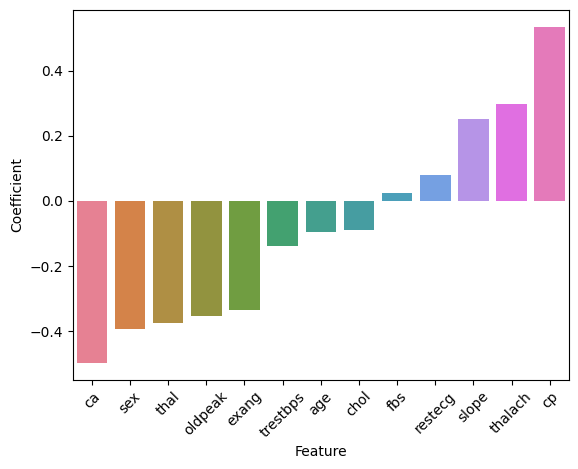

In [34]:
features = X_train.columns
coefficients = pd.DataFrame({'Feature':features,'Coefficient':log_reg_cv.coef_[0]}).sort_values(by='Coefficient')
sns.barplot(x=coefficients['Feature'], y=coefficients['Coefficient'], hue=coefficients['Feature'])
plt.xticks(rotation=45)
plt.show()

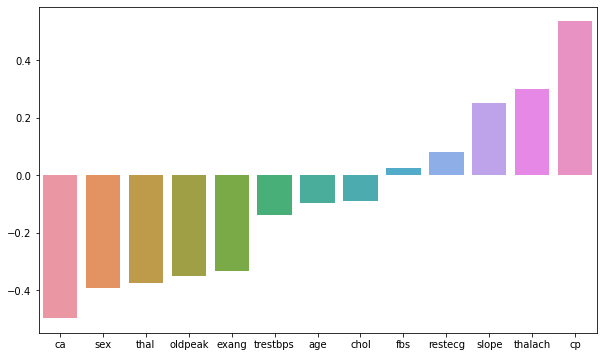

---------

## Evaluatie van de model performantie

**TAAK: Laten we nu je model evalueren op de overige 10% van de gegevens, de testset.**

**TAAK: Maak de volgende evaluaties:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Make predictions on the test set
y_pred = final_model.predict(X_test_scaled)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Compute classification report
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix Array:")
print(conf_matrix)

Confusion Matrix Array:
[[12  3]
 [ 2 14]]


array([[12,  3],
       [ 2, 14]], dtype=int64)

<Figure size 600x400 with 0 Axes>

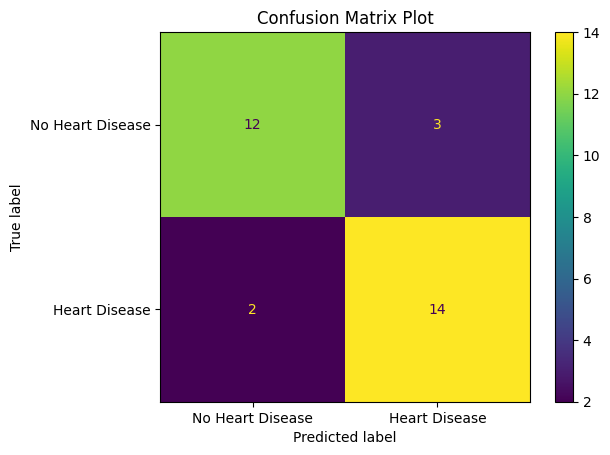


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [36]:
# confusion matrix
plt.figure(figsize=(6,4))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Heart Disease", "Heart Disease"])
disp.plot(cmap='viridis', values_format="d")
plt.title("Confusion Matrix Plot")
plt.show()

print("\nClassification Report:")
print(class_report)

**Model Performance Evaluation**

1️ - Confusion Matrix Array

- 12 True Negatives (TN) → Correctly predicted No Heart Disease
- 14 True Positives (TP) → Correctly predicted Heart Disease
- 3 False Positives (FP) → Incorrectly predicted Heart Disease
- 2 False Negatives (FN) → Incorrectly predicted No Heart Disease

2️ - Confusion Matrix Plot

- The matrix visually shows how well the model classified heart disease cases.
- Darker blue colors indicate more correct classifications.

**Precision:** How many predicted positive cases were actually positive?

**Recall:** How many actual positive cases were correctly predicted?

**F1-score:** The balance between precision and recall.

**Final Thoughts:**

✅ Overall Accuracy: 84% – The model performs well in predicting heart disease.

✅ Balanced Recall & Precision: Both classes are well detected.

✅ Low False Negative Rate: The model correctly identifies most heart disease cases.

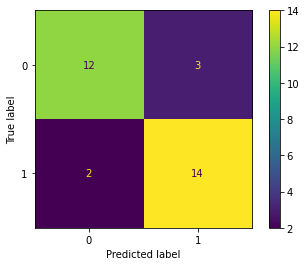

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



### Performance Curves

**TAAK: Maak zowel de precision recall als de ROC Curve.**

(0.0, 1.1)

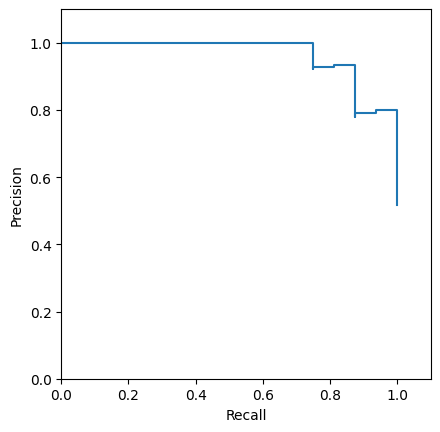

In [ ]:
## precision recall:
fig, ax = plt.subplots()
y_prob = log_reg_cv.predict_proba(X_test_scaled)
y_prob = y_prob[:,1] 
precision, recall, _ = precision_recall_curve(y_test, y_prob)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot(ax=ax)
ax.set_xlim(0, 1.1)
ax.set_ylim(0, 1.1)

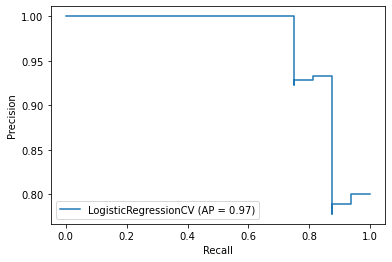

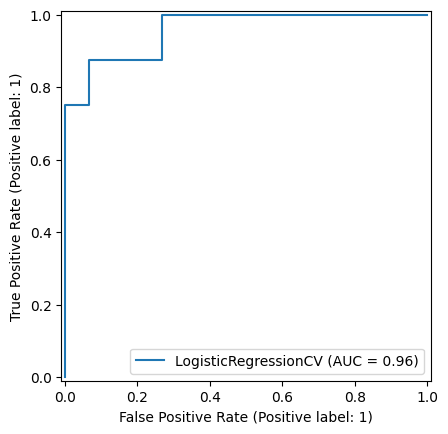

In [38]:
## ROC curve
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(log_reg_cv, X_test_scaled, y_test, ax=ax)

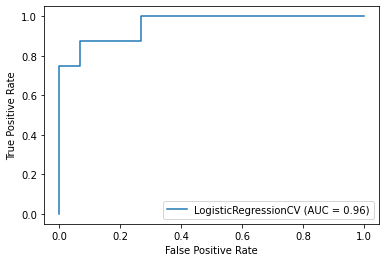

**Eindtaak: Een patiënt met de volgende kenmerken is het medisch centrum binnengekomen:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**TAAK: Wat voorspelt uw model voor deze patiënt? Hebben ze hartziekte? Hoe "zeker" is uw model van deze voorspelling?**

*Voor je gemak heb ik een array van de kenmerken voor de patiënt hierboven gemaakt.*

In [39]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [40]:
patient_scaled = scaler.transform(patient)

c:\Users\PC Gebruiker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [41]:
prediction = log_reg_cv.predict(patient_scaled)
prediction_proba = log_reg_cv.predict_proba(patient_scaled)

print("Predicted Class (0 = No Heart Disease, 1 = Heart Disease):", prediction[0])
print("Prediction Probability:", prediction_proba)

Predicted Class (0 = No Heart Disease, 1 = Heart Disease): 0
Prediction Probability: [[0.94751441 0.05248559]]


In [42]:
prediction_proba

array([[0.94751441, 0.05248559]])

----

## Je bent er!!